In [149]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


training = pd.read_csv('../data/matches_test.csv')[:56000]
validation = pd.read_csv('../data/matches_test.csv')[56000:]

In [150]:
def remove_columns(dataframe):
    labels = dataframe.pop('p1_win')
    dataframe.pop('match_hash')
    dataframe.pop('tourney_name')
    dataframe.pop('tourney_date')
    dataframe.pop('p1_name')
    dataframe.pop('p2_name')

    return labels

In [151]:
training_labels = remove_columns(training)
validation_labels = remove_columns(validation)

In [152]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42, min_samples_leaf = 52, criterion = 'log_loss')
model.fit(training, training_labels)

In [ ]:
# 10-Fold Cross validation
print(np.mean(cross_val_score(model, training, training_labels, cv=10)))

from sklearn.metrics import log_loss

print('validation accuracy', model.score(validation, validation_labels))
print('training accuracy', model.score(training, training_labels))
print('log loss', log_loss(validation_labels, model.predict_proba(validation)))

0.6904464285714287
validation accuracy 0.7195463729387994
training accuracy 0.73725
log loss 0.5618799094698255


In [ ]:
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

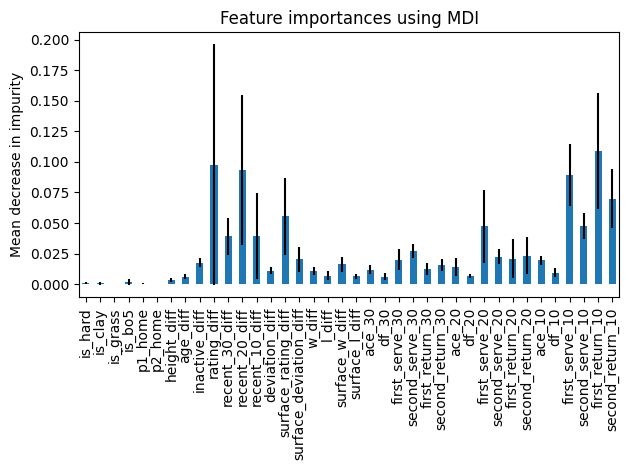

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = training.keys()
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

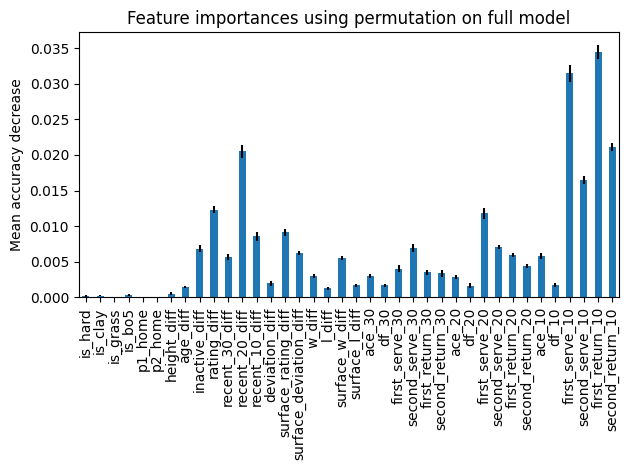

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model, training, training_labels, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()